In [1]:
import datetime as dt

import numpy as np
import pandas as pd

In [2]:
def random_walk(n, start=0, step=1):
    steps = np.random.choice([-step, 0, step], n)
    return start + steps.cumsum()

def to_epoch(time_series):
    return (time_series - dt.datetime(1970, 1, 1)).dt.total_seconds().astype(int)

In [3]:
dr = pd.date_range("2020-01-01T14:00:00", "2020-01-01T15:00:00", freq='S')

### Sensor 1

In [4]:
sensor_a = pd.DataFrame({
    "TIME": dr,
    "TEMP": random_walk(len(dr), 20, 0.1),
    "HUM": random_walk(len(dr), 40, 0.2),
})

In [5]:
sensor_a.head()

,TIME,TEMP,HUM
0,2020-01-01 14:00:00,20.1,40.0
1,2020-01-01 14:00:01,20.2,39.8
2,2020-01-01 14:00:02,20.3,40.0
3,2020-01-01 14:00:03,20.4,40.0
4,2020-01-01 14:00:04,20.3,40.0


<AxesSubplot:xlabel='TIME'>

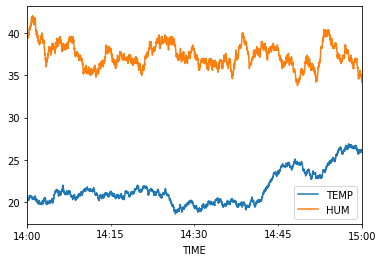

In [6]:
sensor_a.plot(x="TIME")

In [8]:
sensor_a.to_csv(
    "data/sensor_a/20200101.dat",
    sep=";",
    index=False,
)

### Sensor 2

In [9]:
sensor_b = pd.DataFrame({
    "TS": dr,
    "CO2": random_walk(len(dr), 600, 1),
    "NO2": random_walk(len(dr), 2, 0.1),
})

In [10]:
# Resample to minute level
# sensor_b = sensor_b.set_index("TS").resample('T').agg("mean").reset_index()

In [11]:
# Replace sub-zero values
sensor_b = sensor_b.assign(NO2=lambda df: df["NO2"].where(df["NO2"] > 0, 0))

<AxesSubplot:xlabel='TS'>

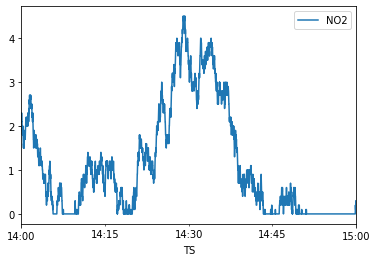

In [12]:
sensor_b.plot(x="TS", y="NO2")

In [13]:
sensor_b = sensor_b.assign(TS=lambda df: to_epoch(df["TS"]))

In [14]:
sensor_b.to_csv(
    "data/sensor_b/20200101.dat",
    sep="|",
    index=False,
    float_format="%.3f",
)